### Q1: Neural Network 


In [2]:
from pathlib import Path
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math




In [3]:
def csv_file_to_numpy_array(csv_file):
    
    x_df = csv_file.drop(csv_file.columns[0], axis=1).div(255).to_numpy()
    y_df = csv_file.drop(csv_file.columns[1:], axis=1)
    XX = []
    for row in x_df:
        XX.append(np.reshape(row, (28, 28)))
    return x_df, y_df[0].to_numpy()


In [4]:


import torch
from google.colab import drive 
drive.mount('/content/gdrive')
csv_train = pd.read_csv('gdrive/MyDrive/golab/datasets/fashion-mnist_train.csv', sep=',', skiprows=1, header=None)
csv_test =  pd.read_csv('gdrive/MyDrive/golab/datasets/fashion-mnist_test.csv', sep=',', skiprows=1, header=None)
x_train, y_train = csv_file_to_numpy_array(csv_train)
x_test, y_test=csv_file_to_numpy_array(csv_test)
x_train, y_train, x_test, y_test = map(
    torch.tensor, (x_train, y_train, x_test, y_test)
)
n, c = x_train.shape

# print(x_train.shape)

Mounted at /content/gdrive


## Q1: part A<br/>
the dataset was added in previous part<br/>
and here, one sample **randomly** selected from<br/>
each class, and is displayed

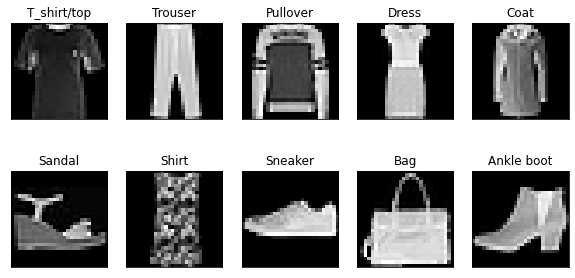

In [22]:
import random

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 5))

for i in range(10):
    ind=(y_train == i).nonzero(as_tuple=True)[0]
    index=random.choice(ind)
    label_index = int(y_train[index])
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index].reshape((28,28)) , cmap='gray')
    plt.title(class_names[label_index])
plt.show()

# Q1: part B
in this section, loss function, accuracy and model<br/>
are defined, all functions are **handmade!**
weights and bias tensors are defined<br/>
actually my network has one layer with 80 neurons<br/>
desired accuracy would be achived!


In [23]:
def loss_func(input, target):
    return -input[range(target.shape[0]), target].mean()


def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)


def model(xb):
    return log_softmax(xb @ weights + bias)



weights = torch.randn(784, 80) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(80, requires_grad=True)

## Q1: part G
model is being trained here<br/>
batch size is 64 samples and model<br/>
is gonna be trained for 100 epochs<br/>
accuracy and loss for both datasets would<br/>
be displayed after each iteration

In [50]:
bs = 64  # batch size
bst=10

xb = x_train[0:bs]  # a mini-batch from x
preds = model(xb.float())  # predictions
preds[0], preds.shape
# print(preds[0], preds.shape)


from IPython.core.debugger import set_trace
loss_list = []
lr = 0.01  # learning rate
epochs = 100  # how many epochs to train for
count=0
for epoch in range(epochs):
    count=0
    for i in range((n - 1) // bs + 1):
        #         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb.float())
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()
       
            loss_list.append(loss_func(model(xb.float()), yb))
            count=count+1

            
            start_t = i * bst
            end_t = start_t + bst
            xt=x_test[start_t:end_t]
            yt=y_test[start_t:end_t]
            print('epoch: {} Iteration: {} Train_Loss: {}  Train_Acc: {} %'.format(epoch+1,count, loss_func(model(xb.float()), yb), accuracy(model(xb.float()), yb)))
            print('                        Test_Loss: {}  Test_Acc: {} %'.format(loss_func(model(xt.float()), yt), accuracy(model(xt.float()), yt)))
            print('----------------------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.
                        Test_Loss: 0.3446817398071289  Test_Acc: 0.8999999761581421 %
----------------------------------------------------------------------------------
epoch: 99 Iteration: 211 Train_Loss: 0.3467952311038971  Train_Acc: 0.90625 %
                        Test_Loss: 0.20739412307739258  Test_Acc: 0.8999999761581421 %
----------------------------------------------------------------------------------
epoch: 99 Iteration: 212 Train_Loss: 0.3404849171638489  Train_Acc: 0.890625 %
                        Test_Loss: 0.25725144147872925  Test_Acc: 0.8999999761581421 %
----------------------------------------------------------------------------------
epoch: 99 Iteration: 213 Train_Loss: 0.297751784324646  Train_Acc: 0.90625 %
                        Test_Loss: 0.9052149057388306  Test_Acc: 0.699999988079071 %
----------------------------------------------------------------------------------
epoch: 99 Iteration: 214 Train_Loss: 0

## Q1: part D
the model is succesfully trained<br/>
here u can c the Accuracy for all data<br/>
on train and test datasets<br/>
which is more than 80%<br/>
wish u like it

In [51]:
print('Training dataset Loss: {}  Accuracy: {} %'.format(loss_func(model(x_train.float()), y_train), accuracy(model(x_train.float()), y_train)))
print('Test     dataset Loss: {}   Accuracy: {} %'.format(loss_func(model(x_test.float()), y_test), accuracy(model(x_test.float()), y_test)))

Training dataset Loss: 0.37426117062568665  Accuracy: 0.8707000017166138 %
Test     dataset Loss: 0.4144015610218048   Accuracy: 0.8575999736785889 %


## Q1: part D
9 samples randomly are displayed here<br/>
Predicted and Real labels are here too<br/>
u can rerun it for new result

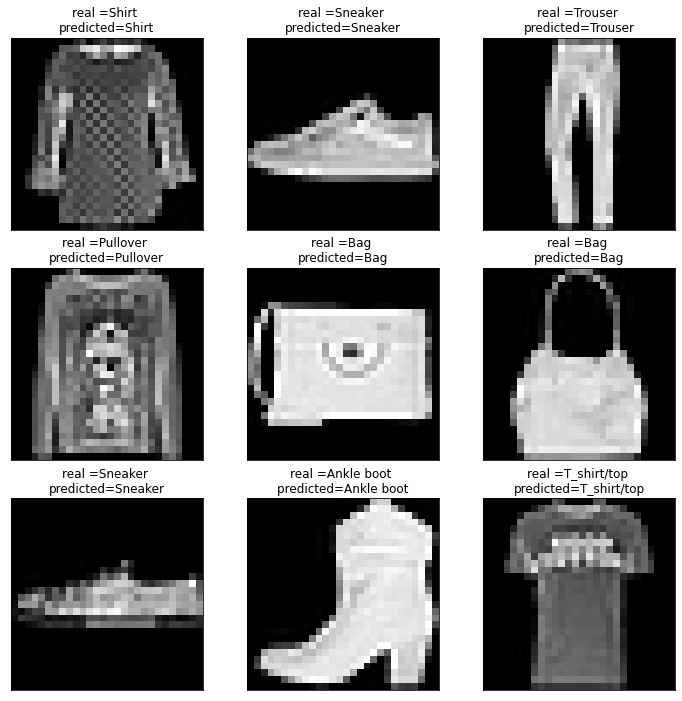

In [109]:
plt.figure(figsize=(12, 12))

for i in range(9):

    index=random.randint(0,10000)
    label_index = int(y_test[index])
    ypre= torch.argmax(model(x_test[index].float()))
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[index].reshape((28,28)) , cmap='gray')
    plt.title('real =' +class_names[label_index]  + ' \npredicted='+ class_names[ypre])

plt.show()